<a href="https://colab.research.google.com/github/CarlMk7734/project2/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Regression model of Air bnb booking prices prediction

The choice of using a Random Forest Regression model in a particular analysis or prediction task depends on the characteristics of the data and the problem going to be solved. Random Forest Regression is a machine learning algorithm that is commonly used for regression tasks, and it offers several advantages:

**Non-Linearity:** Random Forest Regression can capture non-linear relationships between input features (predictors) and the target variable. In many real-world problems, the relationship between variables is not strictly linear, and Random Forest can model these relationships effectively.

**Robustness:** Random Forest is robust to outliers and noisy data. It works well even when the data contains outliers or is not perfectly clean. The ensemble nature of Random Forest helps reduce the impact of individual noisy data points.

**Feature Importance:** Random Forest provides a feature importance score, which can help identify the most important features in making predictions. This is valuable for feature selection and understanding which variables have the most significant impact on the target variable.

**Ensemble Learning:** Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. This ensemble approach tends to reduce overfitting and increase the model's generalization capabilities.

**Parallelization:** Random Forest can be easily parallelized, making it efficient for processing large datasets and taking advantage of multi-core processors.

**Handling Missing Data:** Random Forest can handle missing data effectively without the need for imputation. It does this by making predictions based on available data in the ensemble of decision trees.

**Reduced Risk of Overfitting:** The ensemble nature of Random Forest, along with techniques like bagging and random feature selection, helps reduce the risk of overfitting the model to the training data.

In [ ]:
# Import all libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # ploting the data
import seaborn as sns # ploting the data
import math # calculation

## Import Libraries
**import pandas as pd**: This import brings in the pandas library and assigns it the alias "pd." Pandas is a popular library for data manipulation and analysis. It provides data structures like dataframes and tools for working with structured data, such as reading and writing data from/to CSV files.

**import numpy as np**: This import brings in the numpy library and assigns it the alias "np." Numpy is a fundamental library for numerical and array operations in Python. It provides support for working with multi-dimensional arrays and mathematical functions to operate on these arrays efficiently.

import matplotlib.pyplot as plt: This import brings in the pyplot module from the matplotlib library and assigns it the alias "plt." Matplotlib is a powerful library for creating visualizations and plots in Python. The pyplot module provides an interface for creating various types of charts, graphs, and plots.

**import seaborn as sns**: This import brings in the seaborn library and assigns it the alias "sns." Seaborn is a data visualization library built on top of matplotlib. It simplifies the process of creating aesthetically pleasing and informative statistical graphics, making it easier to create complex visualizations.

**import math**: This import brings in the built-in math module in Python. The math module provides various mathematical functions and constants for performing mathematical operations in your code. It includes functions for basic arithmetic, trigonometry, logarithms, and more.

In [ ]:
# load the data
data = pd.read_csv('AB_NYC_2019.csv')

**pd.read_csv('AB_NYC_2019.csv')**: This line of code uses the read_csv function from the pandas library (imported as pd) to read data from a CSV file named 'AB_NYC_2019.csv'. The data is read and stored in a pandas DataFrame.

pd is the alias for the pandas library that is imported earlier.
read_csv is a function provided by pandas to read data from a CSV (Comma-Separated Values) file.
'AB_NYC_2019.csv' is the name of the CSV file from which you want to read data. Make sure that the file is located in the same directory as your Python script or specify the full file path if it's in a different location.

In [ ]:
# Visualize data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

The code **data.info()** is used to visualize and print information about the data stored in the data DataFrame. It provides an overview of the DataFrame's structure, including details such as the number of rows and columns, data types, and non-null values for each column. This information can be helpful for understanding the dataset and identifying potential data cleaning or preprocessing tasks. Here's what each part of the output typically means:

In [ ]:
# Drop the data that are not of interest and/or causing privacy issues
data.drop(['id','host_name','last_review'], axis=1, inplace=True)
# Visualize the first 5 rows
data.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


**data.drop(['id', 'host_name', 'last_review'], axis=1, inplace=True)**: This line of code drops the specified columns from the **'data'** DataFrame. The columns to be dropped are 'id', 'host_name', and 'last_review'. The **axis=1** argument indicates that the operation should be performed along columns (i.e., dropping columns). The **inplace=True** argument means that the DataFrame is modified in place, and the changes are reflected without the need to assign the result to a new variable.

**data.head()**: This line of code displays the first 5 rows of the DataFrame, allowing you to see the DataFrame's structure and content after the specified columns have been dropped.

In [ ]:
# Determine the number of missing values for every column
data.isnull().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [140]:
#replacing all NaN values in 'reviews_per_month' with 0
data.fillna({'reviews_per_month':0}, inplace=True)

In [ ]:
#examine the dataset
(data[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']]
 .describe())

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# Exclude property with listed price of 0
data = data.loc[data['price'] > 0]
# data_copy = data.copy()

In [ ]:
#examine the dataset
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# Recode data as categorical
data_encoded = data.copy()
data_encoded['minimum_nights'] = pd.qcut(data['minimum_nights'], q=2, labels=["minimum_nights_low", "minimum_nights_high"])
data_encoded['number_of_reviews'] = pd.qcut(data['number_of_reviews'], q=3, labels=["number_of_reviews_low", "minimum_nights_medium", "number_of_reviews_high"])
data_encoded['reviews_per_month'] = pd.qcut(data['reviews_per_month'], q=2, labels=["reviews_per_month_low", "reviews_per_month_high"])
data_encoded['calculated_host_listings_count'] = pd.cut(data['calculated_host_listings_count'],
                                                bins=[0, 2, 327],
                                                labels=["calculated_host_listings_count_low", "calculated_host_listings_count_high"])
data_encoded['availability_365'] = pd.qcut(data['availability_365'], q=2, labels=["availability_low", "availability_high"])

In [ ]:
data_encoded.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [ ]:
data_encoded.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,minimum_nights_low,minimum_nights_medium,reviews_per_month_low,calculated_host_listings_count_high,availability_high
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,minimum_nights_low,number_of_reviews_high,reviews_per_month_high,calculated_host_listings_count_low,availability_high
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,minimum_nights_low,number_of_reviews_low,reviews_per_month_low,calculated_host_listings_count_low,availability_high
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,minimum_nights_low,number_of_reviews_high,reviews_per_month_high,calculated_host_listings_count_low,availability_high
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,minimum_nights_high,minimum_nights_medium,reviews_per_month_low,calculated_host_listings_count_low,availability_low


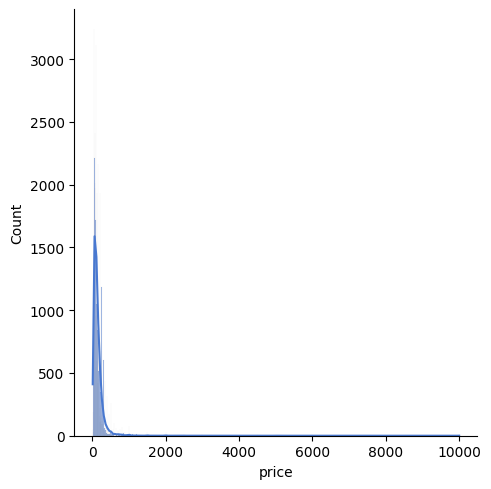

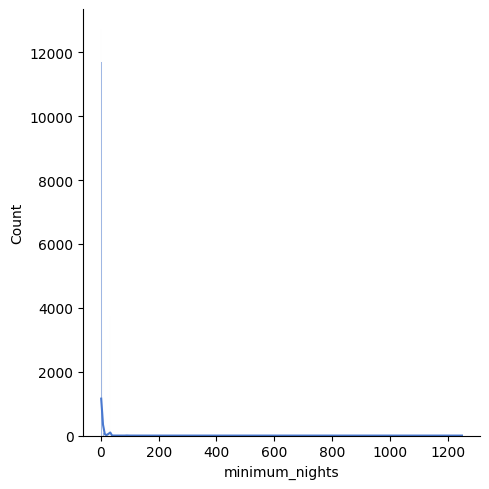

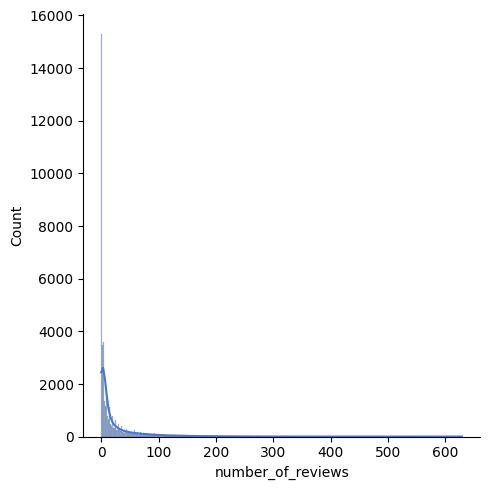

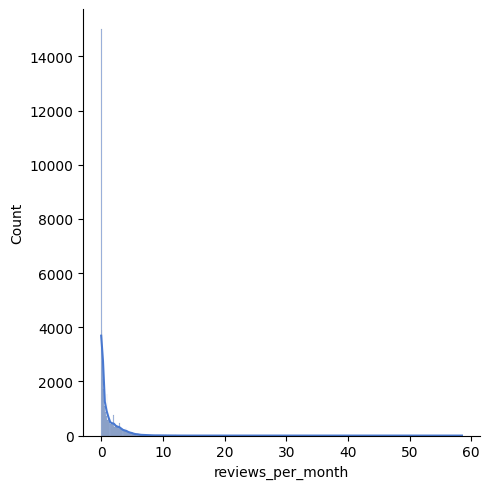

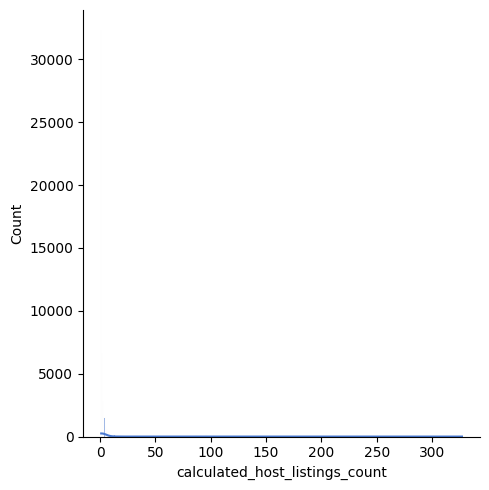

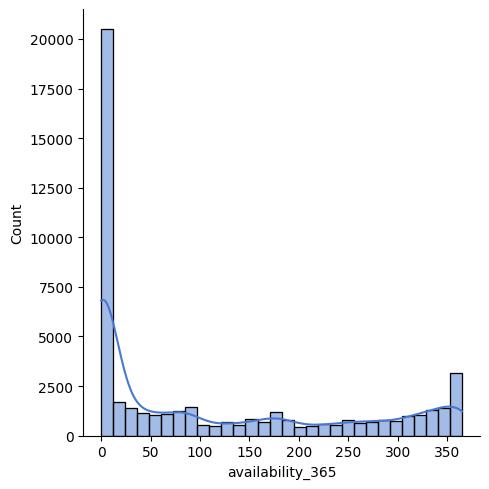

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace distplot with displot or histplot
sns.displot(data['price'], kde=True)  # For the 'price' column
sns.displot(data['minimum_nights'], kde=True)  # For the 'minimum_nights' column
sns.displot(data['number_of_reviews'], kde=True)  # For the 'number_of_reviews' column
sns.displot(data['reviews_per_month'], kde=True)  # For the 'reviews_per_month' column
sns.displot(data['calculated_host_listings_count'], kde=True)  # For the 'calculated_host_listings_count' column
sns.displot(data['availability_365'], kde=True)  # For the 'availability_365' column

plt.show()


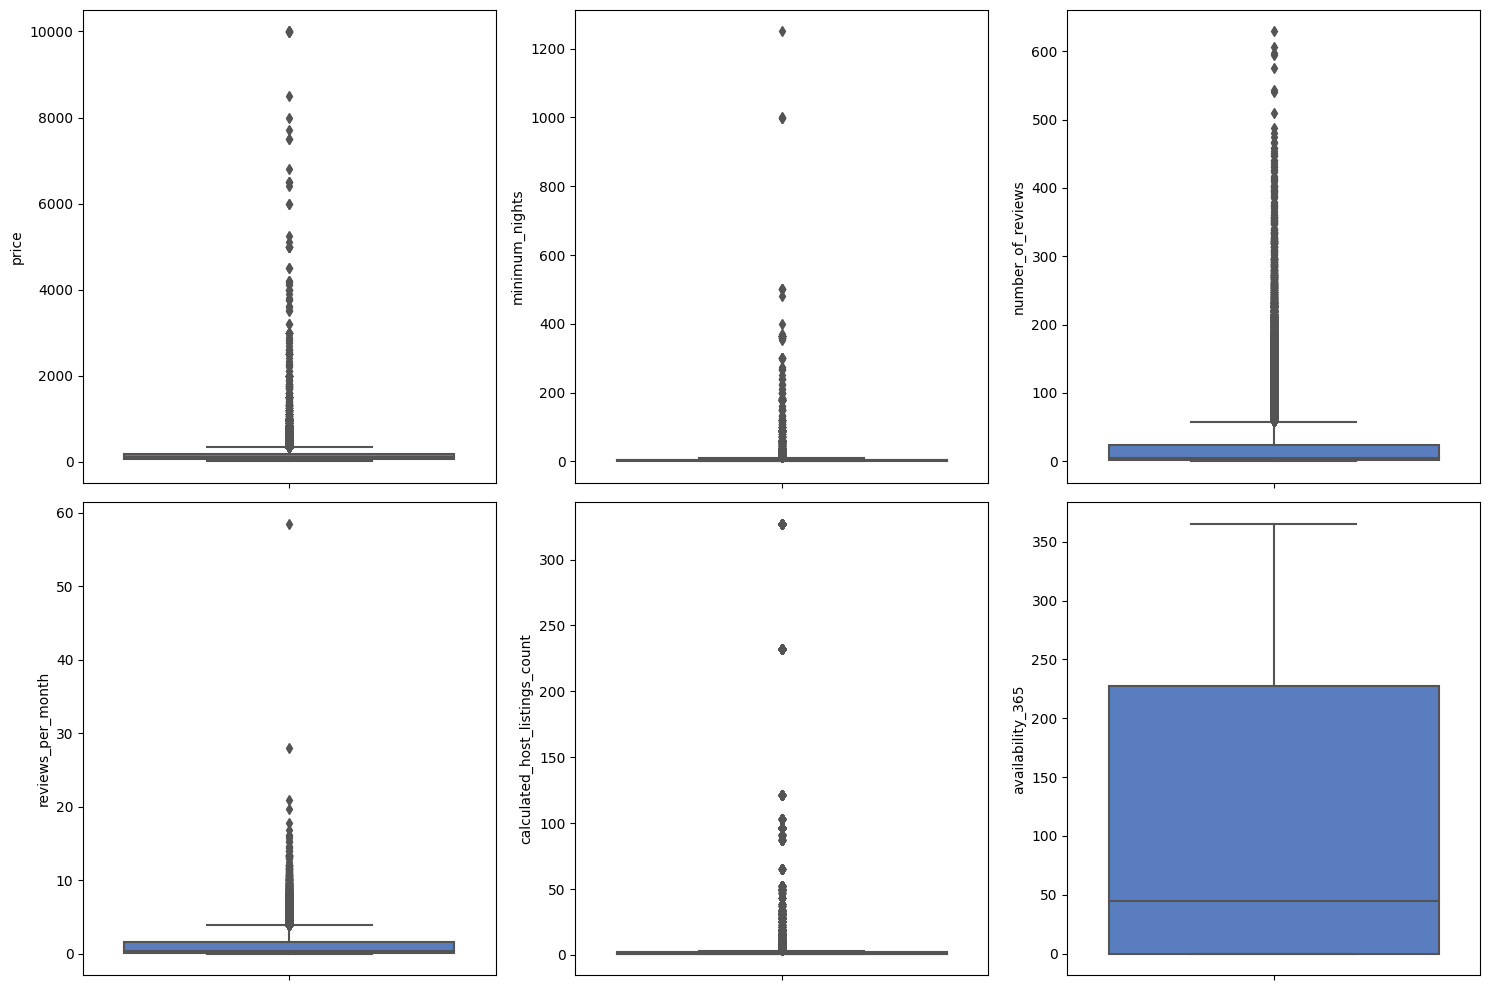

In [ ]:
from pylab import *
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(2, 3, figsize=(15, 10))

subplot(2, 3, 1)
sns.boxplot(y=data['price'])

subplot(2, 3, 2)
sns.boxplot(y=data['minimum_nights'])

subplot(2, 3, 3)
sns.boxplot(y=data['number_of_reviews'])

subplot(2, 3, 4)
sns.boxplot(y=data['reviews_per_month'])

subplot(2, 3, 5)
sns.boxplot(y=data['calculated_host_listings_count'])

subplot(2, 3, 6)
sns.boxplot(y=data['availability_365'])

plt.tight_layout()  # Avoid overlap of plots

# Explicitly remove any overlapping axes
for i in range(6, len(ax.flat)):
    plt.delaxes(ax.flat[i])

plt.show()


In [ ]:
# Set up color blind friendly color palette
# The palette with grey:
cbPalette = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
# The palette with black:
cbbPalette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

# sns.palplot(sns.color_palette(cbPalette))
# sns.palplot(sns.color_palette(cbbPalette))

sns.set_palette(cbPalette)
#sns.set_palette(cbbPalette)

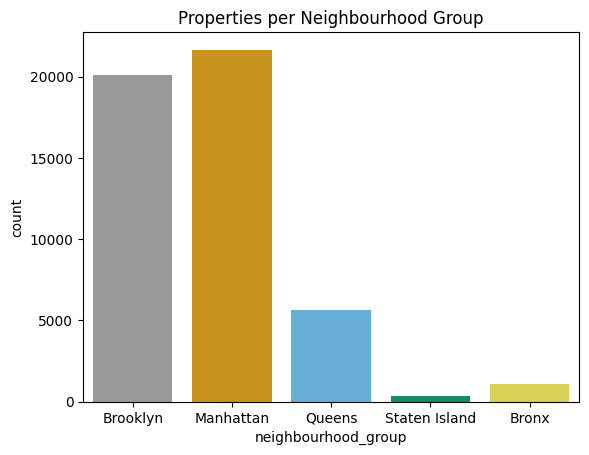

In [ ]:
title = 'Properties per Neighbourhood Group'
sns.countplot(data=data, x='neighbourhood_group')
plt.title(title)
plt.show()


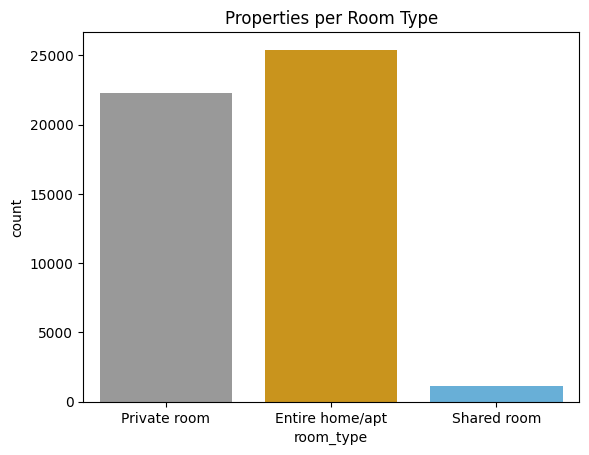

In [ ]:
title = 'Properties per Room Type'
sns.countplot(data=data, x='room_type')
plt.title(title)
plt.show()

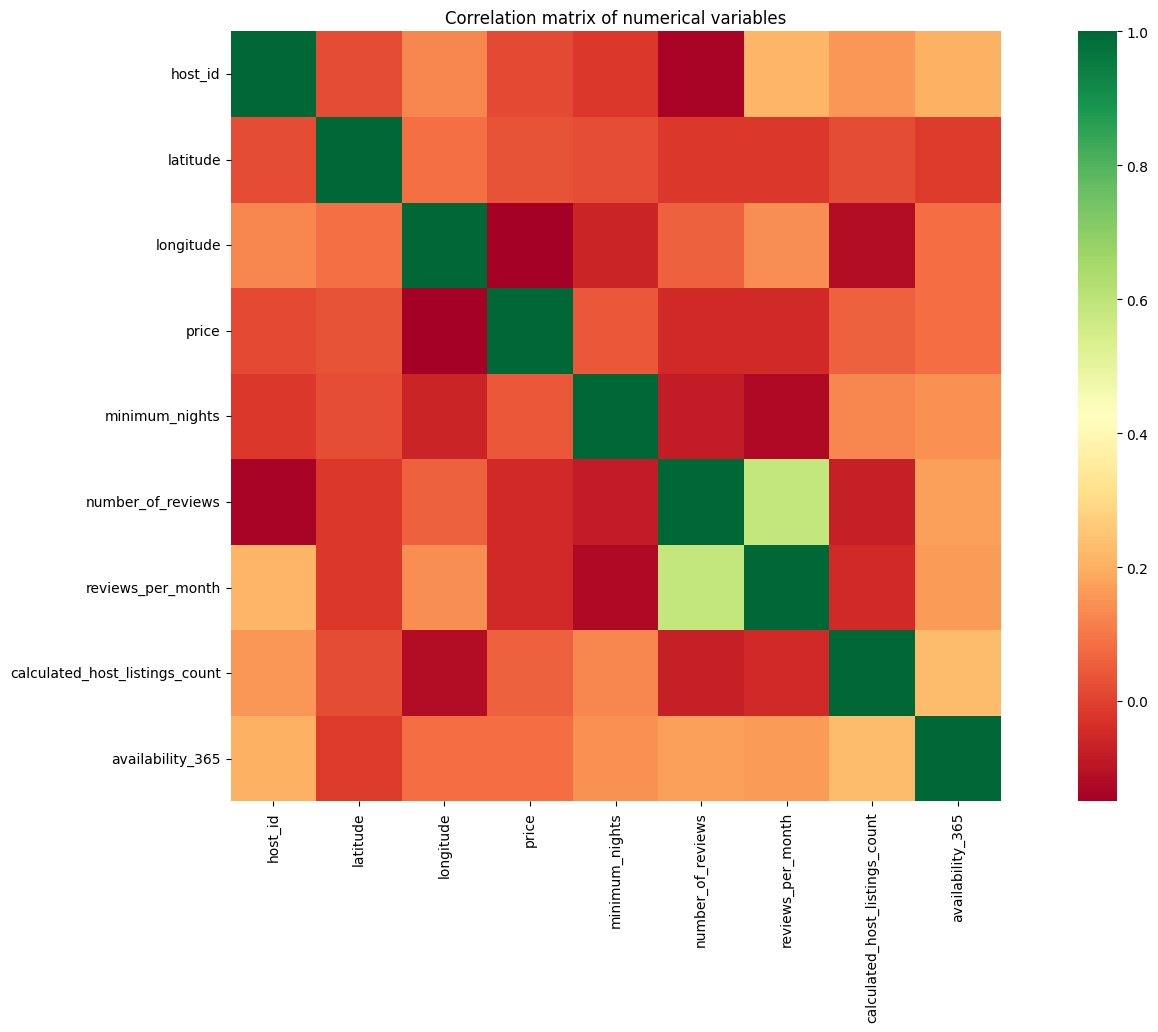

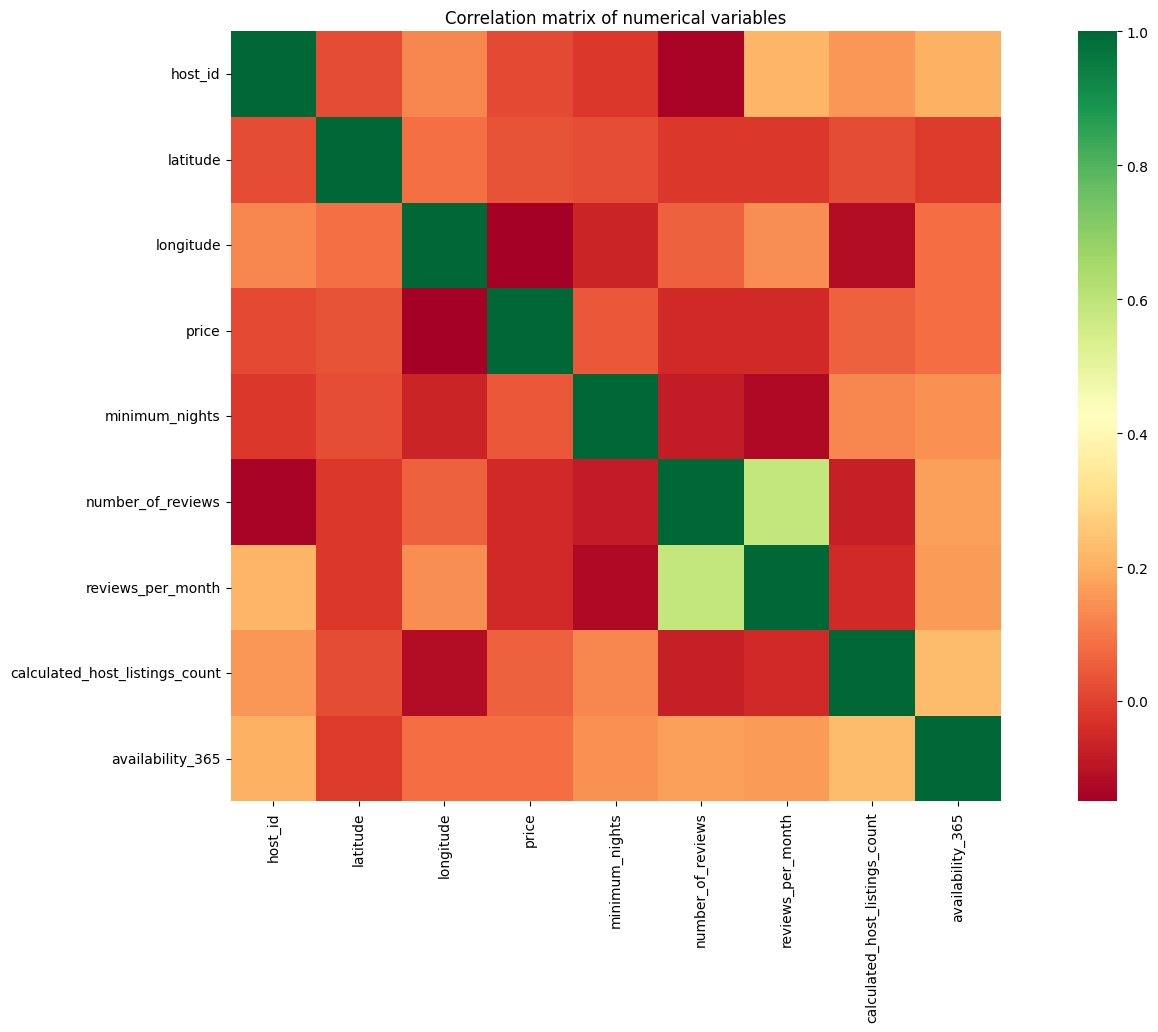

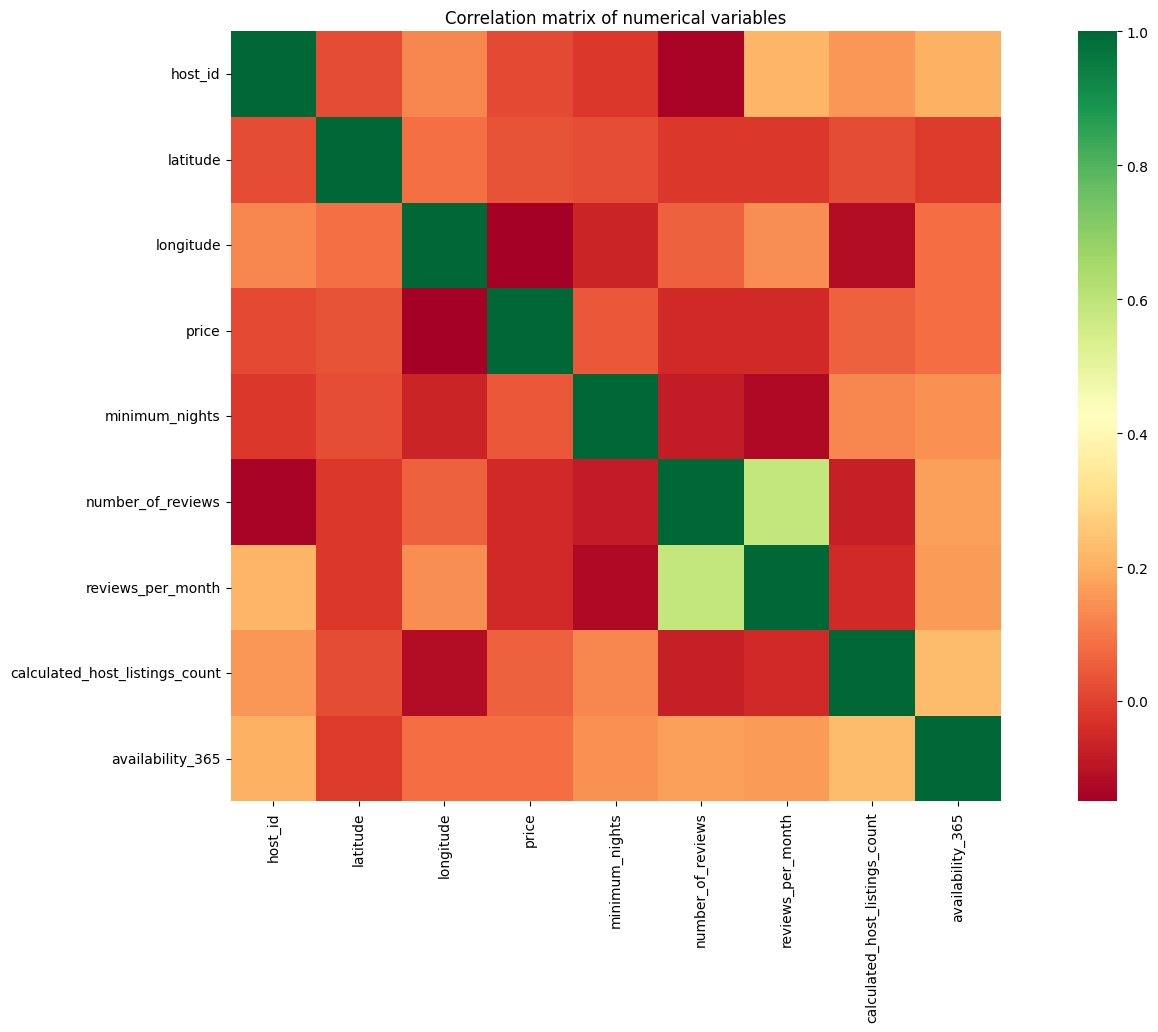

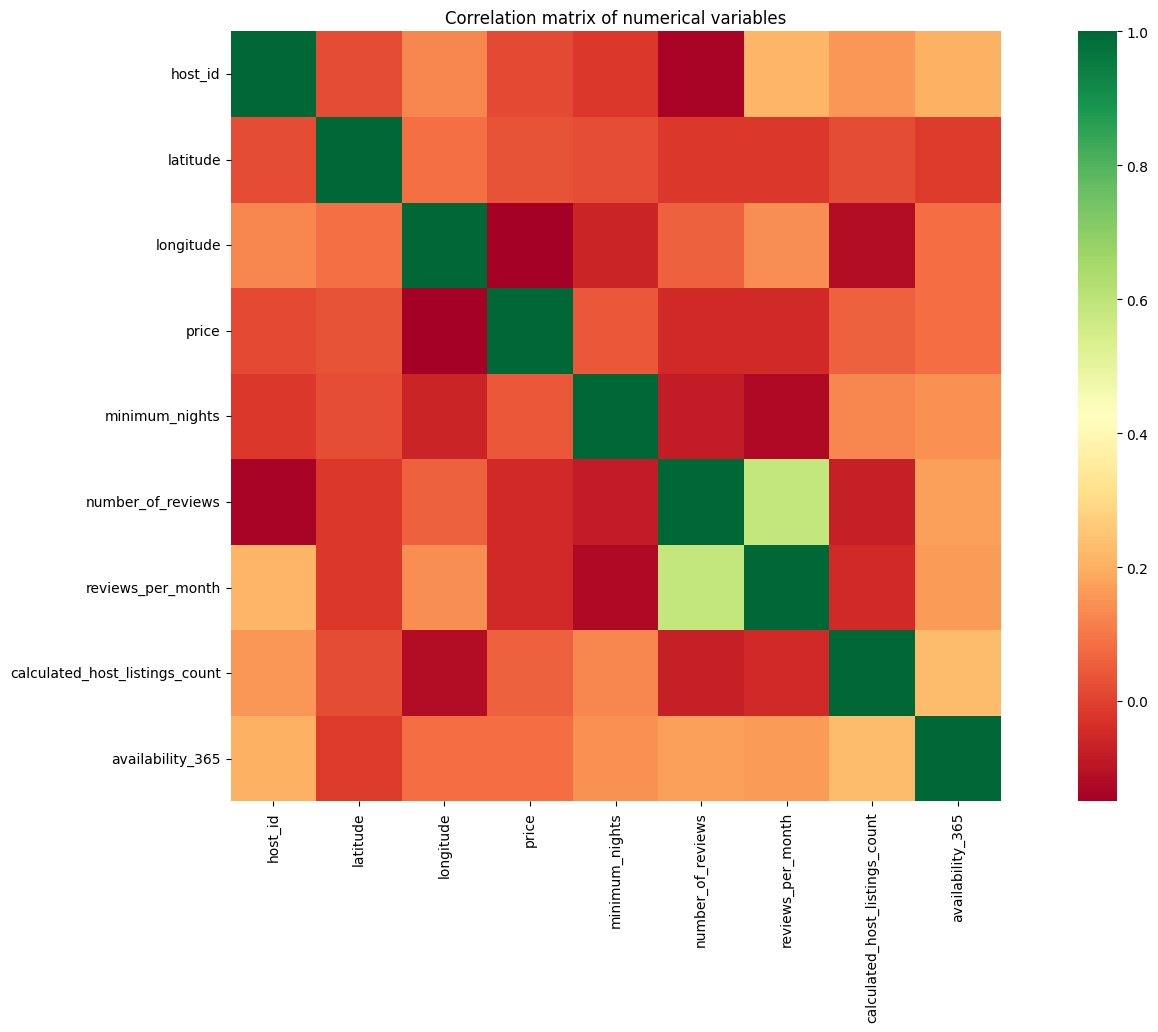

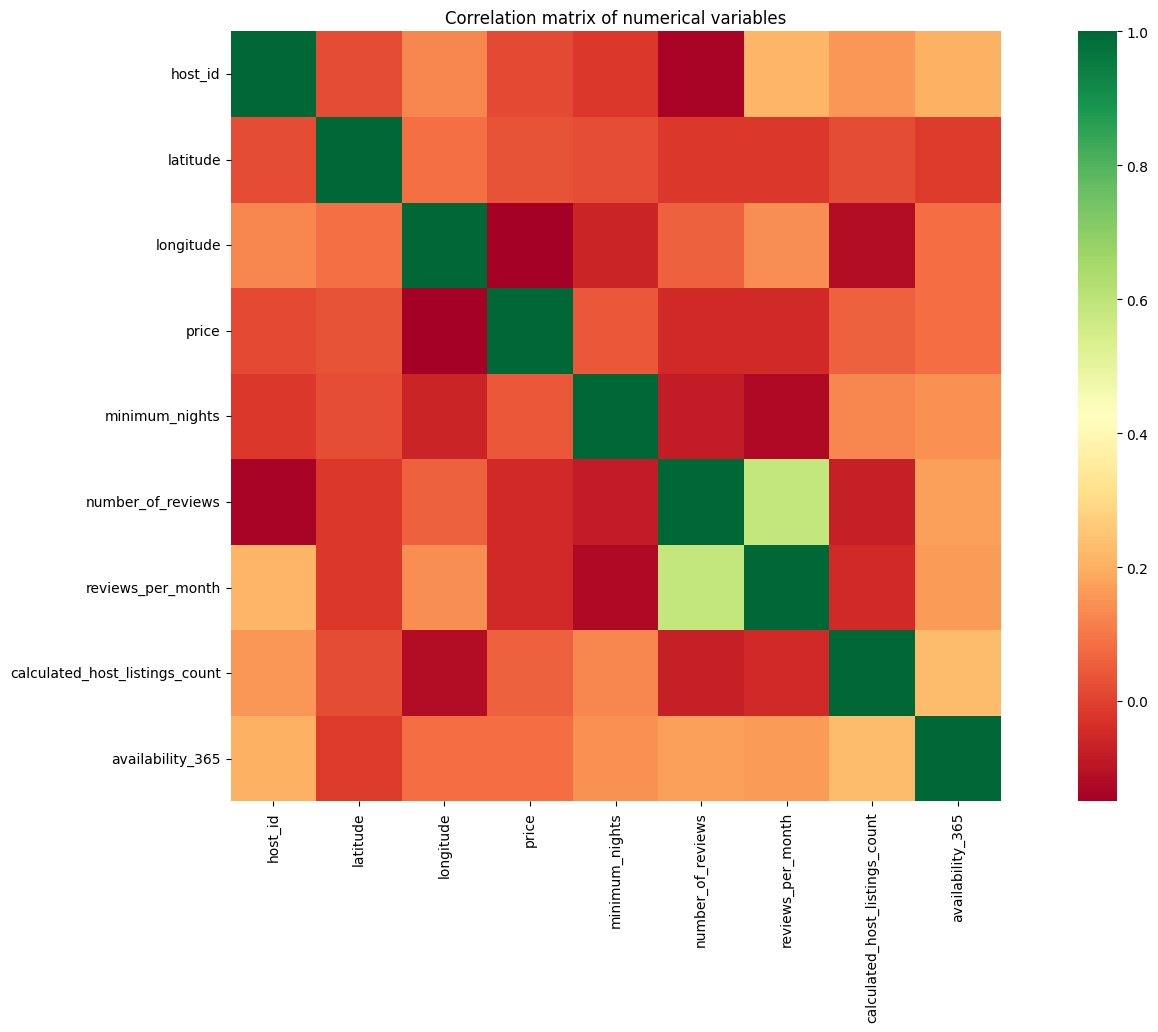

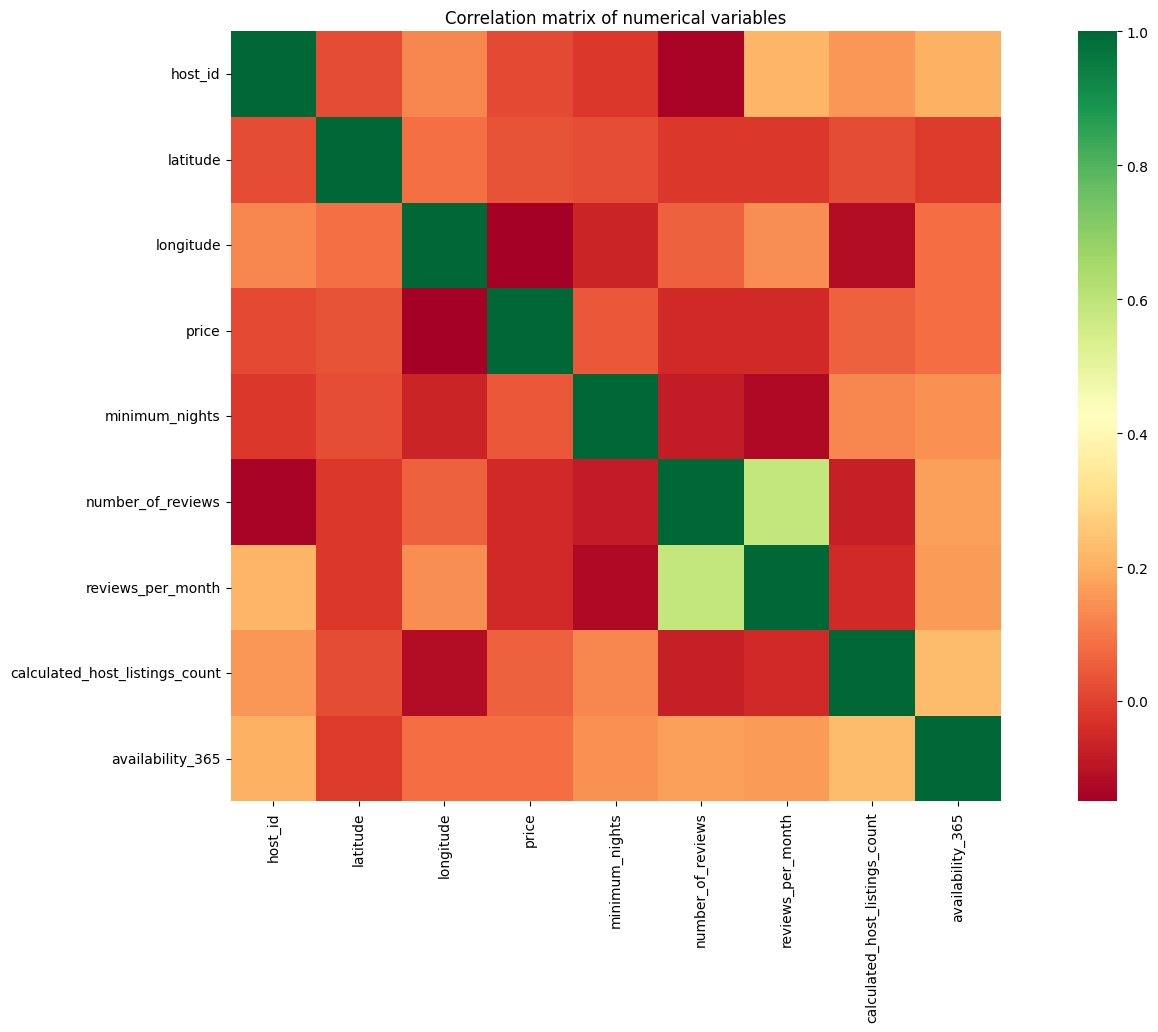

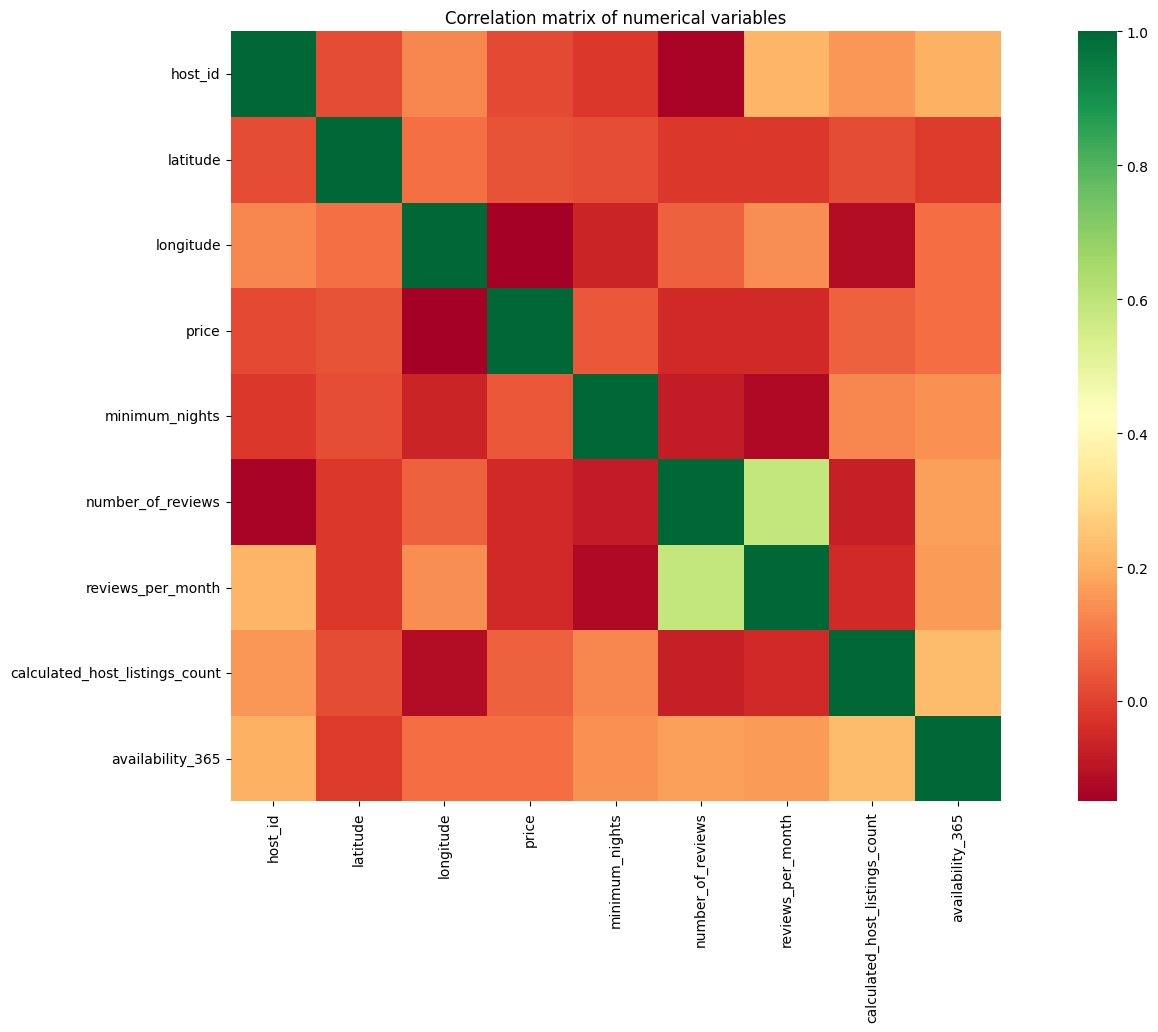

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix with explicit numeric_only parameter
correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(20, 10))
title = 'Correlation matrix of numerical variables'
sns.heatmap(correlation_matrix, square=True, cmap='RdYlGn')
plt.title(title)
plt.show()  # This is necessary to display the plot in a Jupyter Notebook cell


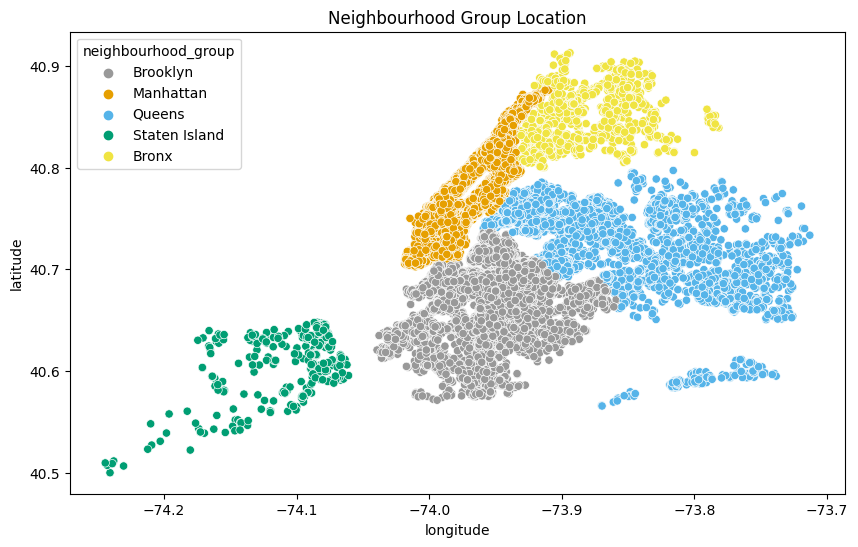

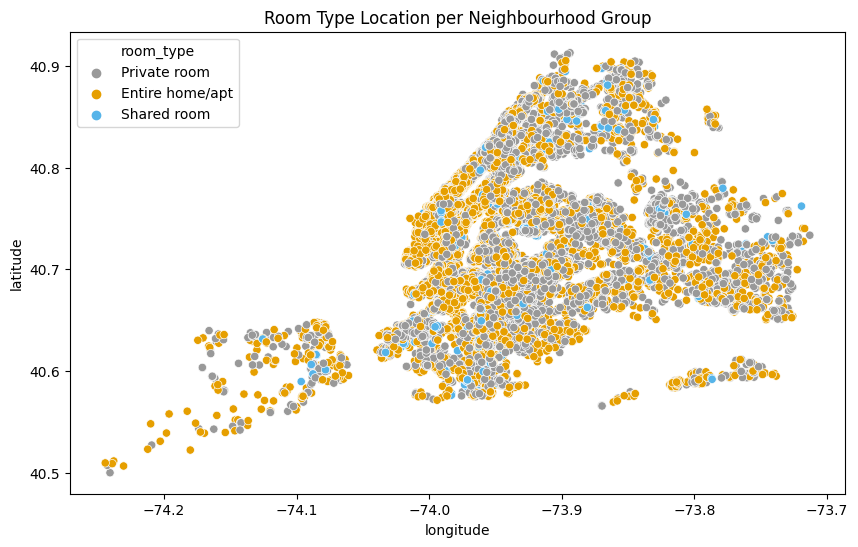

In [ ]:
# Scatter plot for "Neighbourhood Group Location"
title1 = 'Neighbourhood Group Location'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='neighbourhood_group')
plt.title(title1)
plt.show()

# Scatter plot for "Room Type Location per Neighbourhood Group"
title2 = 'Room Type Location per Neighbourhood Group'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='room_type')
plt.title(title2)
plt.show()


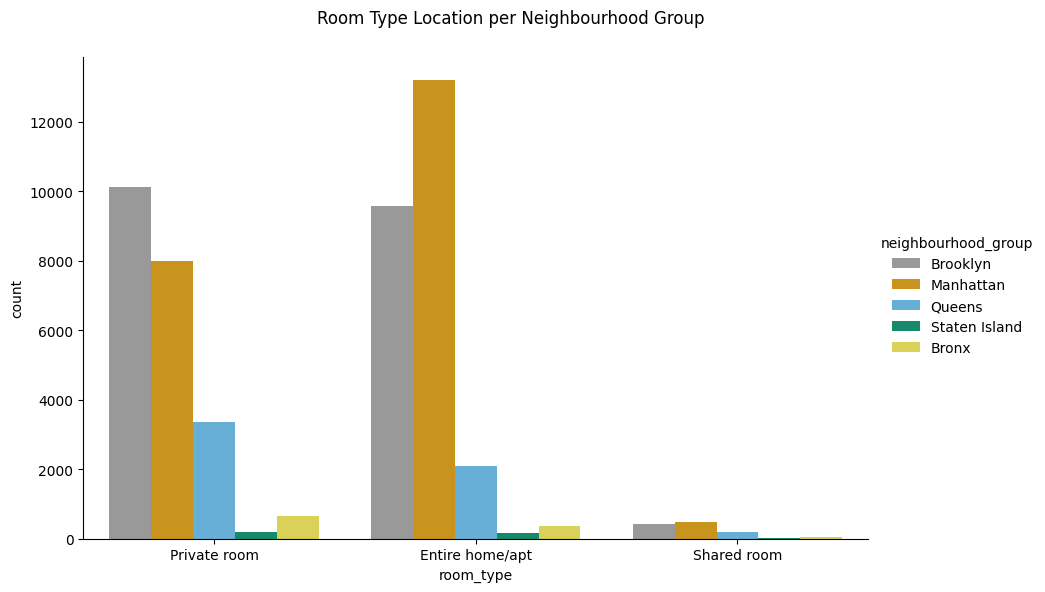

In [ ]:
# Define the title
title = 'Room Type Location per Neighbourhood Group'

# Create a countplot using sns.catplot
g = sns.catplot(x='room_type', kind='count', hue='neighbourhood_group', data=data, height=6, aspect=1.5)
g.fig.subplots_adjust(top=0.9)  # Adjust the title position
g.fig.suptitle(title)  # Set the title

# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

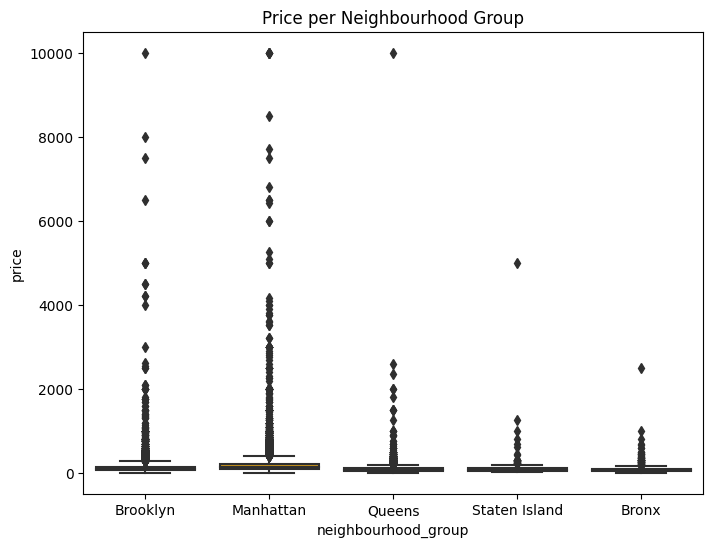

In [ ]:
x= 'neighbourhood_group'
y= 'price'
title = 'Price per Neighbourhood Group'

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data)
plt.title(title)
plt.ioff()
plt.show()

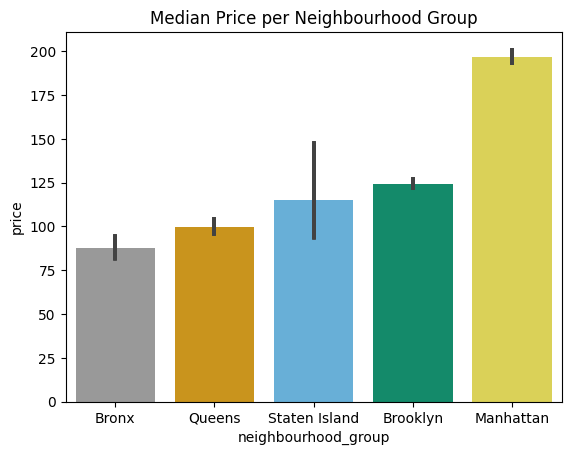

In [ ]:
title = 'Median Price per Neighbourhood Group'
result = data.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='neighbourhood_group', y="price", data=data, order=result['neighbourhood_group'])
plt.title(title)
plt.ioff()
plt.show()

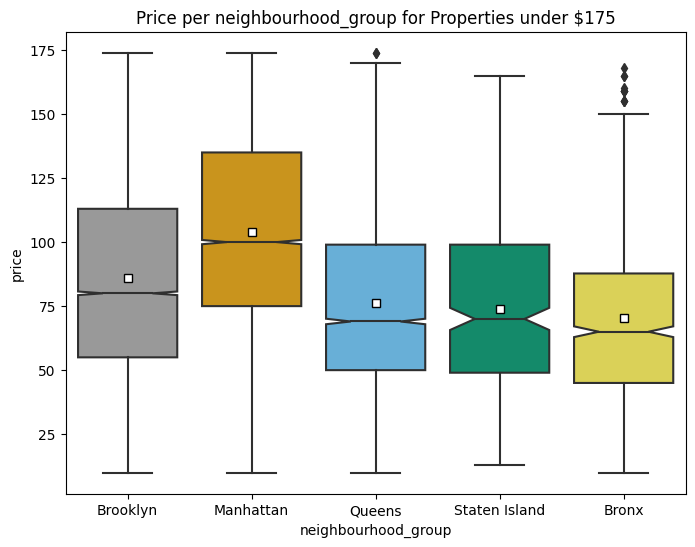

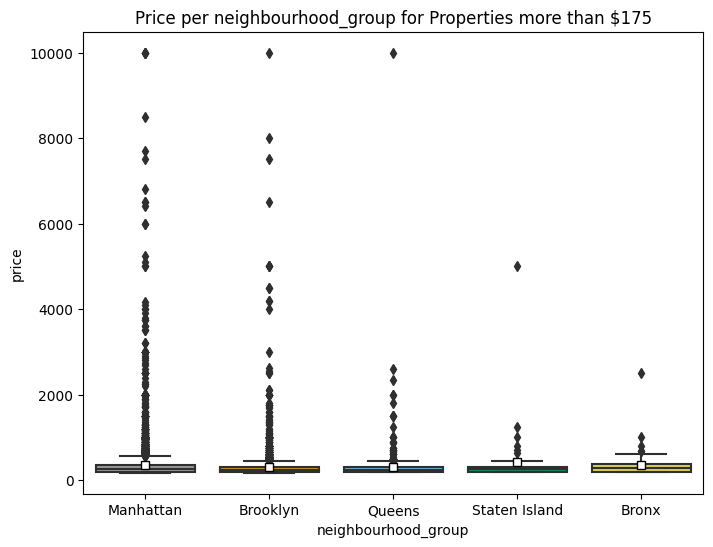

In [ ]:
x='neighbourhood_group'
y='price'

title = 'Price per neighbourhood_group for Properties under $175'
data_filtered = data.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()
f
title = 'Price per neighbourhood_group for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

data_filtered = data.loc[data['price'] < 175]

mod = ols('price ~ neighbourhood_group',data=data_filtered).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                           sum_sq       df           F  PR(>F)
neighbourhood_group  4.188339e+06      4.0  806.494493     0.0
Residual             4.666018e+07  35939.0         NaN     NaN


In [ ]:
pair_t = mod.t_test_pairwise('neighbourhood_group')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Brooklyn-Bronx,15.539434,1.161363,13.380342,9.863414e-41,13.263127,17.815740,4.931707e-40,True
Manhattan-Bronx,33.543248,1.170763,28.650759,1.605347e-178,31.248517,35.837978,1.284278e-177,True
Queens-Bronx,6.060759,1.235087,4.907151,9.281261e-07,3.639951,8.481566,2.784376e-06,True
Staten Island-Bronx,3.662572,2.283992,1.603584,1.088146e-01,-0.814120,8.139264,2.057885e-01,False
Manhattan-Brooklyn,18.003814,0.422746,42.587799,0.000000e+00,17.175220,18.832408,0.000000e+00,True
Queens-Brooklyn,-9.478675,0.577467,-16.414234,2.509627e-60,-10.610527,-8.346823,1.756739e-59,True
Staten Island-Brooklyn,-11.876861,2.006152,-5.920220,3.244239e-09,-15.808979,-7.944743,1.297696e-08,True
Queens-Manhattan,-27.482489,0.596146,-46.100273,0.000000e+00,-28.650953,-26.314025,0.000000e+00,True
Staten Island-Manhattan,-29.880675,2.011608,-14.854123,9.193965e-50,-33.823488,-25.937863,5.516379e-49,True
Staten Island-Queens,-2.398186,2.049712,-1.170011,2.420042e-01,-6.415684,1.619311,2.420042e-01,False


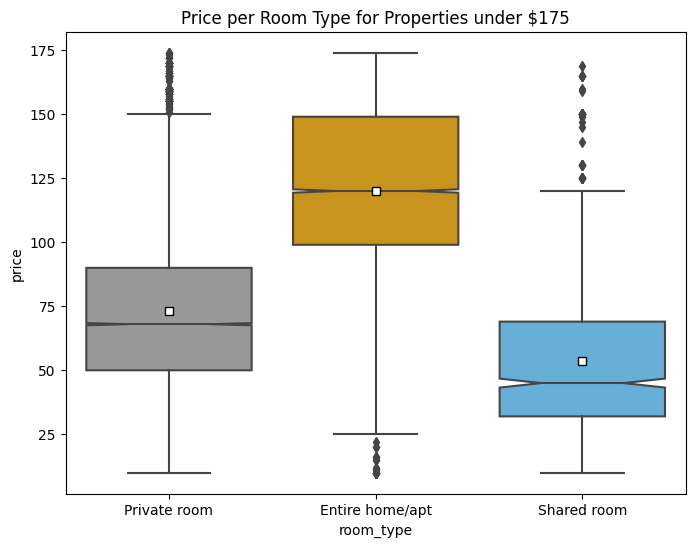

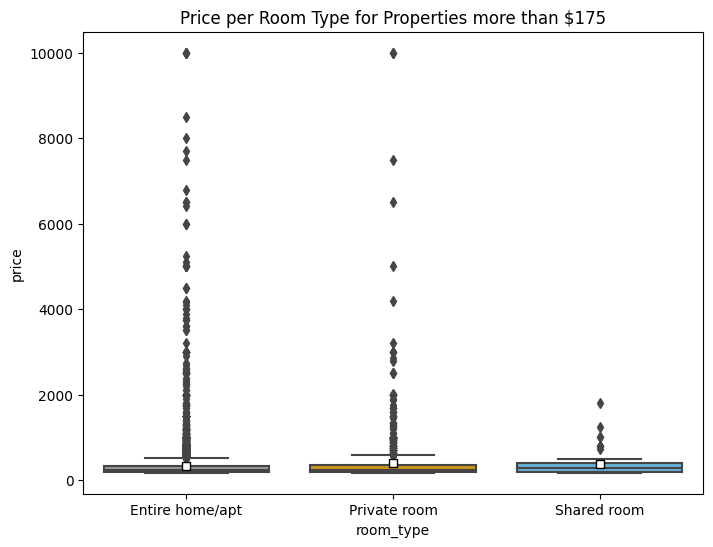

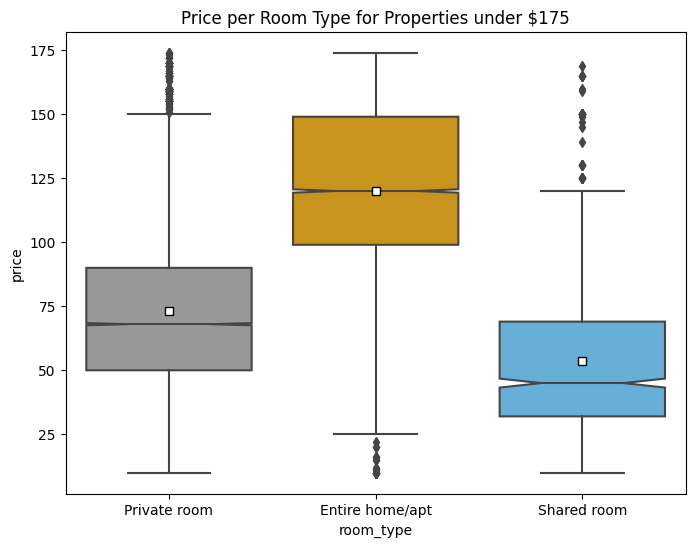

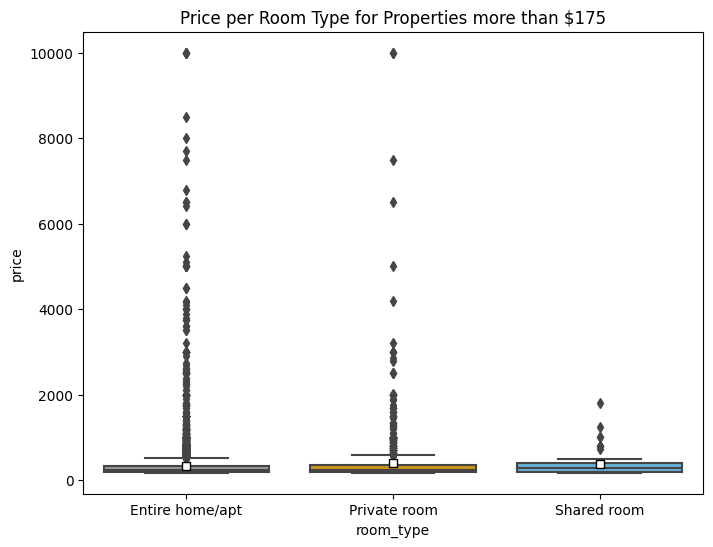

In [ ]:
title = 'Price per Room Type for Properties under $175'
data_filtered = data.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

title = 'Price per Room Type for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=data_filtered, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()
plt.show()

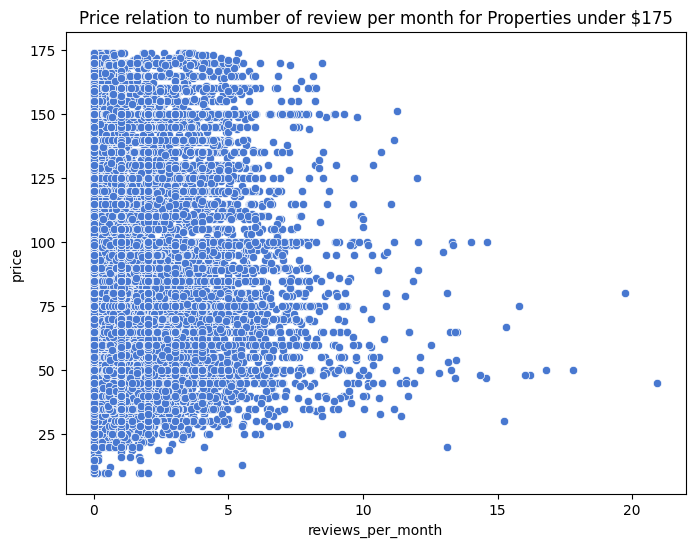

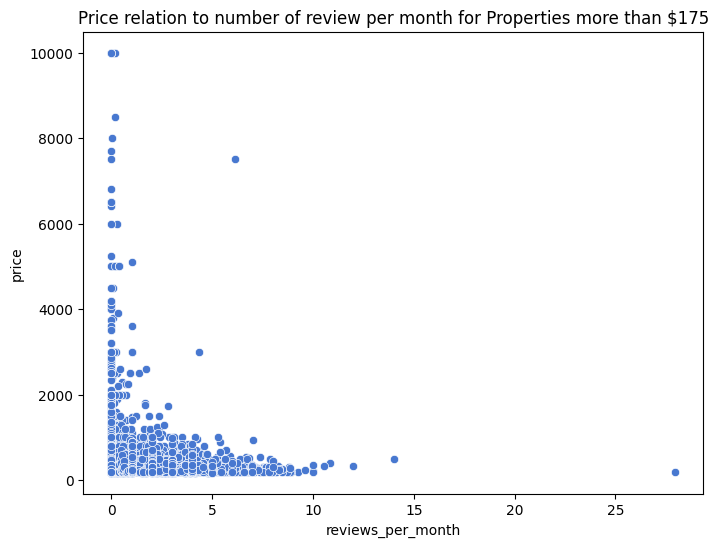

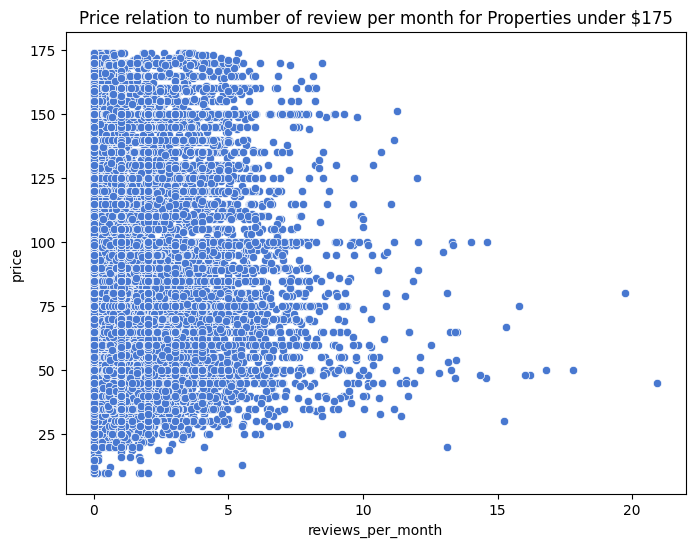

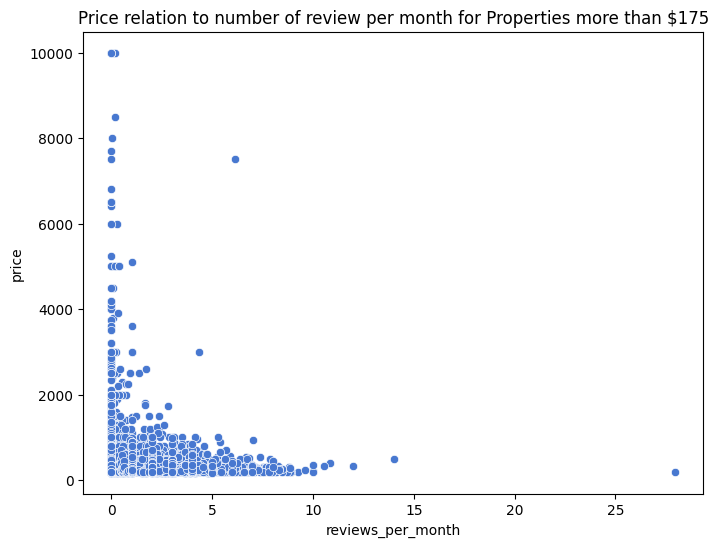

In [ ]:
sns.set_palette("muted")
x = 'reviews_per_month'
y = 'price'

title = 'Price relation to number of review per month for Properties under $175'
data_filtered = data.loc[(data['price'] < 175) & (data['reviews_per_month'] < 30)]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price relation to number of review per month for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()
sns.set_palette(cbPalette)
plt.show()

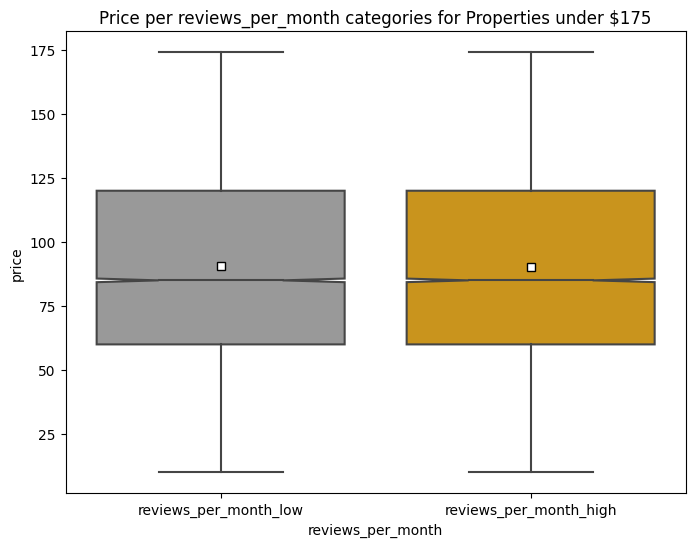

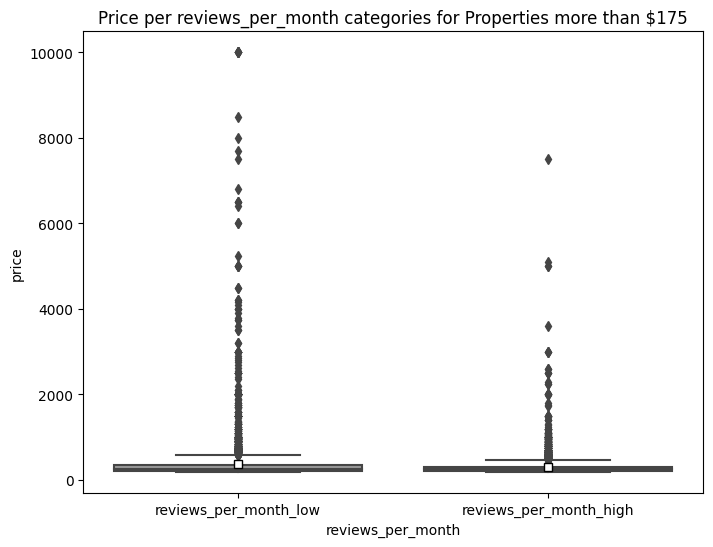

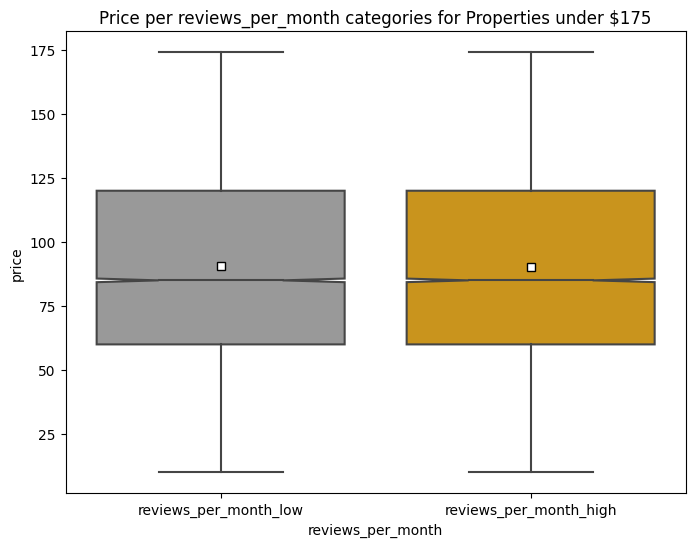

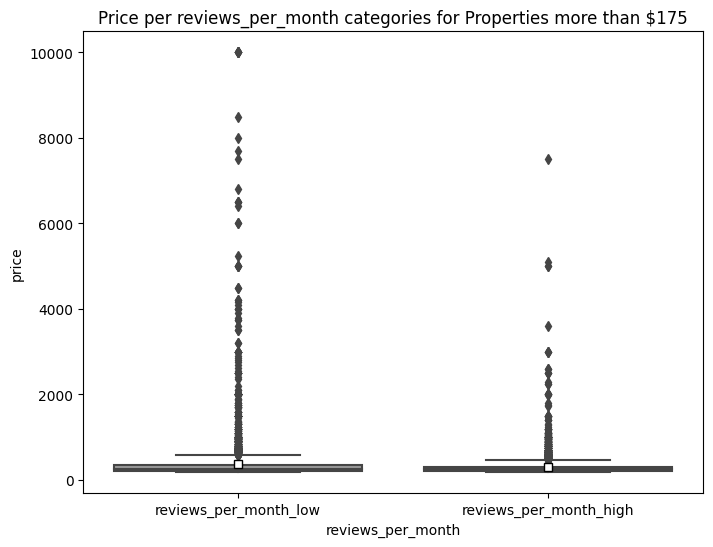

In [ ]:
x='reviews_per_month'
y='price'

title = 'Price per reviews_per_month categories for Properties under $175'
data_filtered = data_encoded.loc[data_encoded['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

title = 'Price per reviews_per_month categories for Properties more than $175'
data_filtered = data_encoded.loc[data_encoded['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()
plt.show()



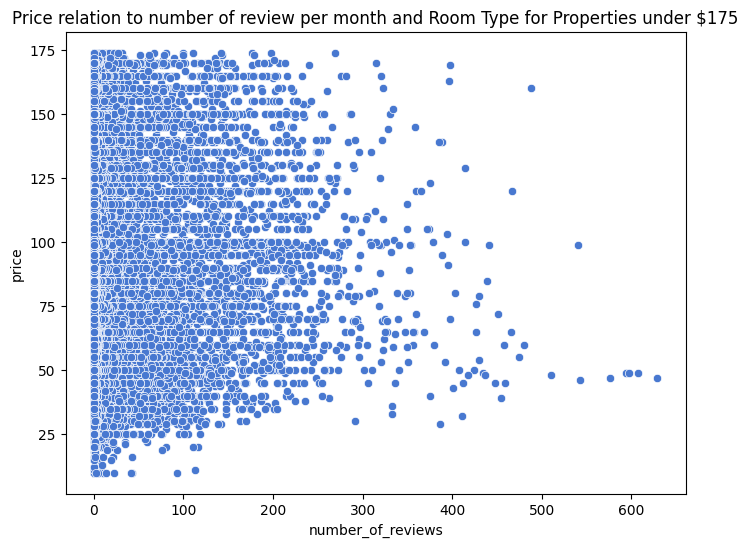

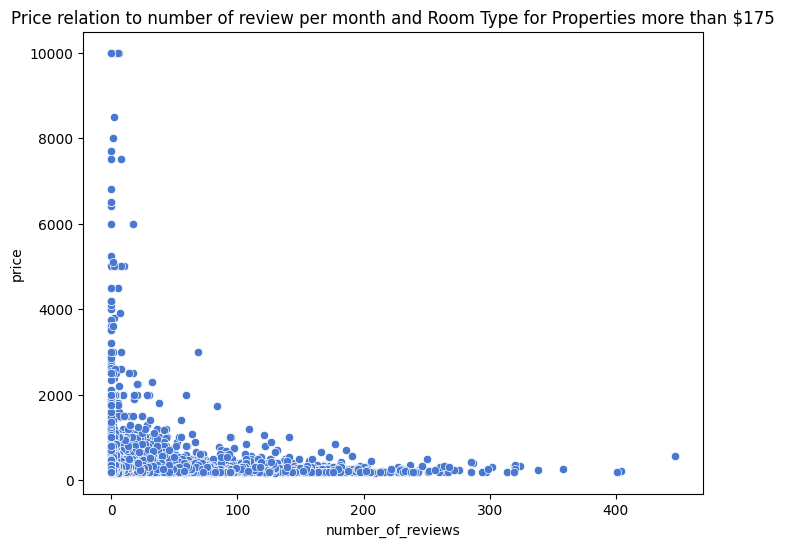

In [ ]:
sns.set_palette("muted")
x = 'number_of_reviews'
y = 'price'

title = 'Price relation to number of review per month and Room Type for Properties under $175'
data_filtered = data.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price relation to number of review per month and Room Type for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()
sns.set_palette(cbPalette)
plt.show()


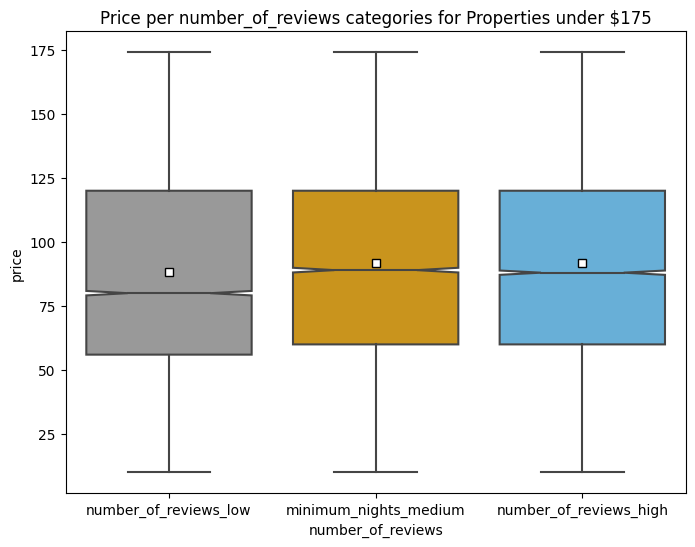

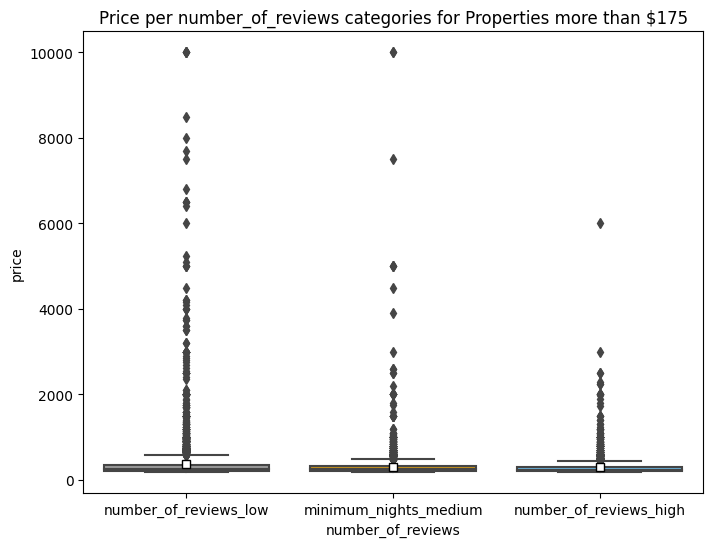

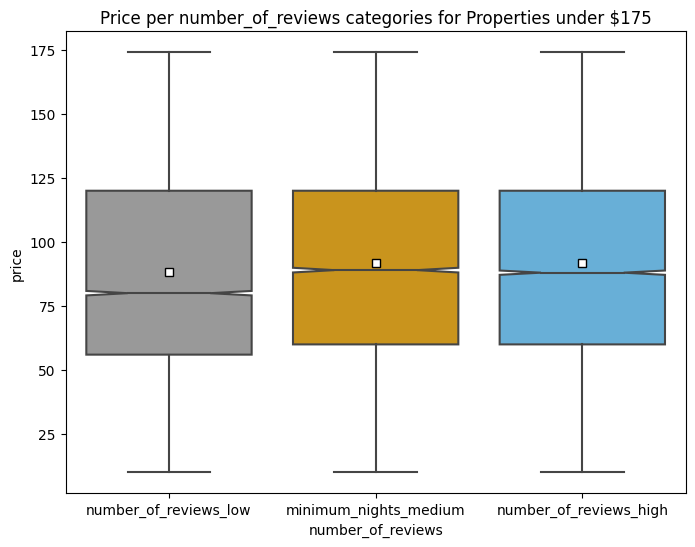

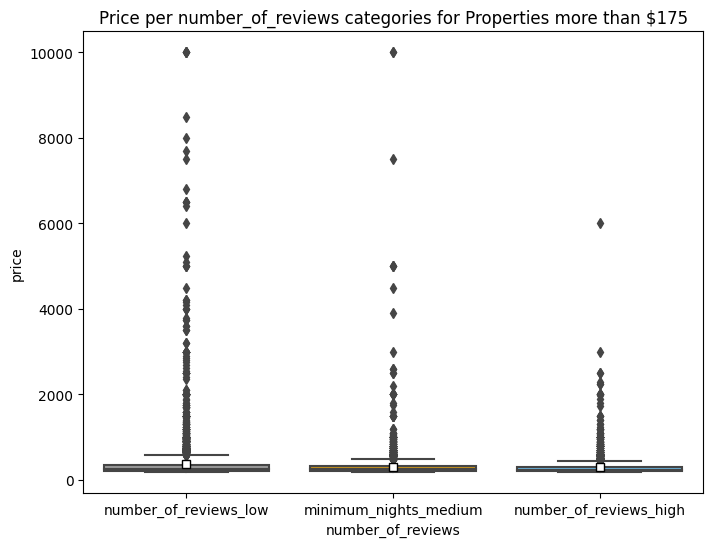

In [ ]:
x = 'number_of_reviews'
y='price'

title = 'Price per number_of_reviews categories for Properties under $175'
data_filtered = data_encoded.loc[data_encoded['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

title = 'Price per number_of_reviews categories for Properties more than $175'
data_filtered = data_encoded.loc[data_encoded['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()
plt.show()

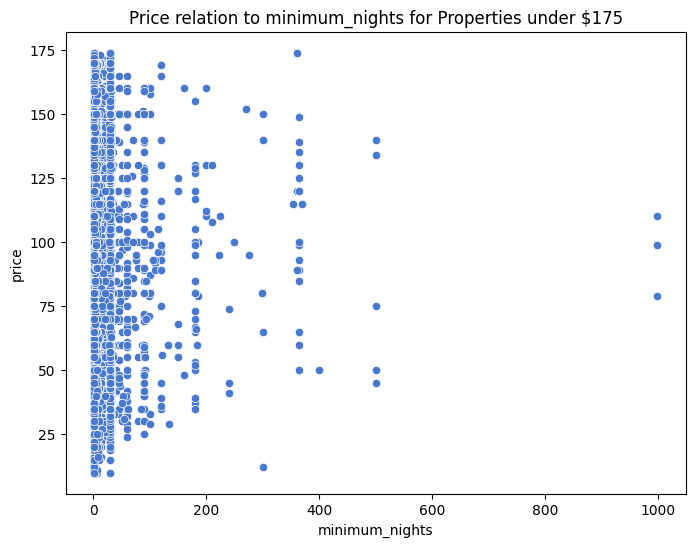

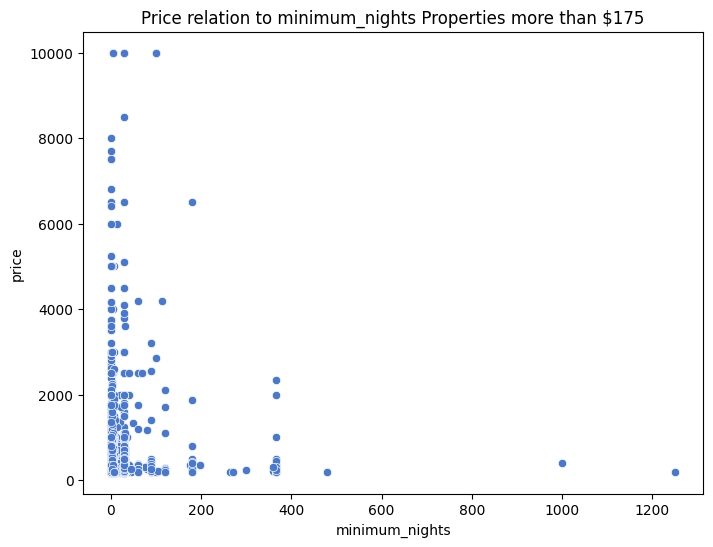

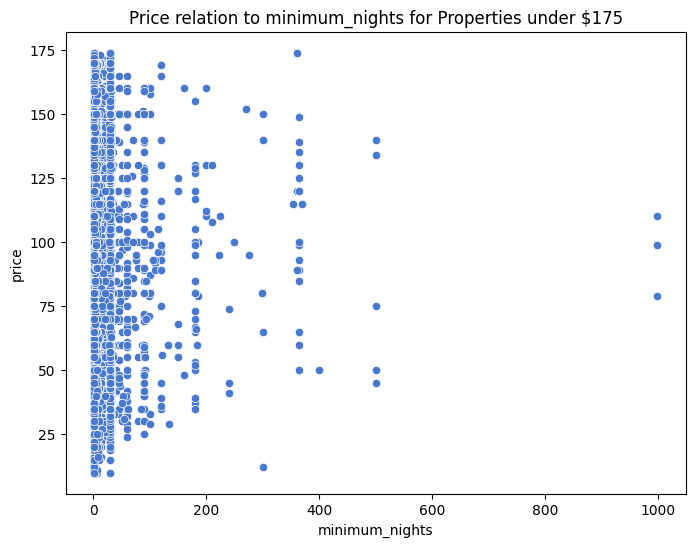

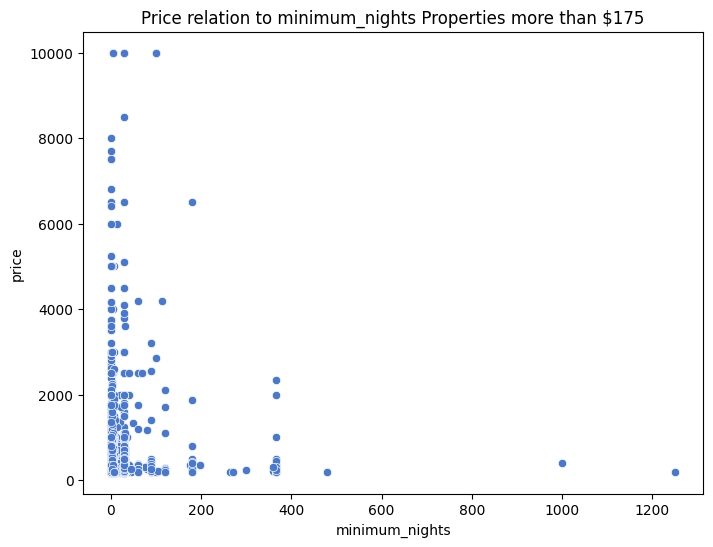

In [ ]:
sns.set_palette("muted")
x = 'minimum_nights'
y = 'price'

title = 'Price relation to minimum_nights for Properties under $175'
data_filtered = data.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price relation to minimum_nights Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()
sns.set_palette(cbPalette)
plt.show()

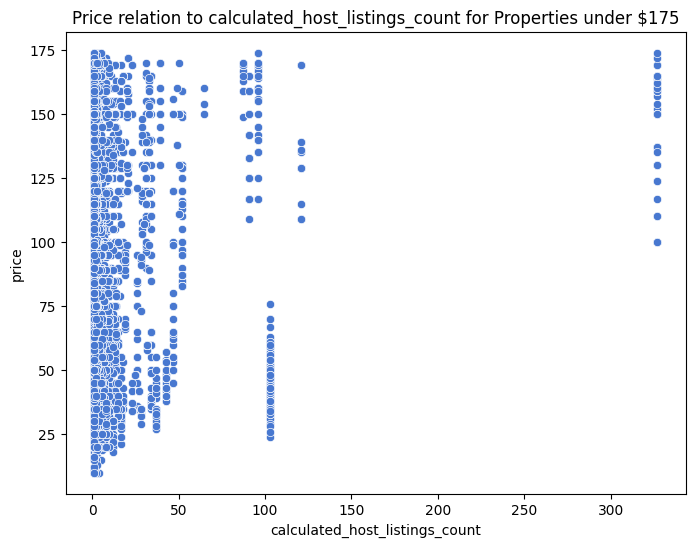

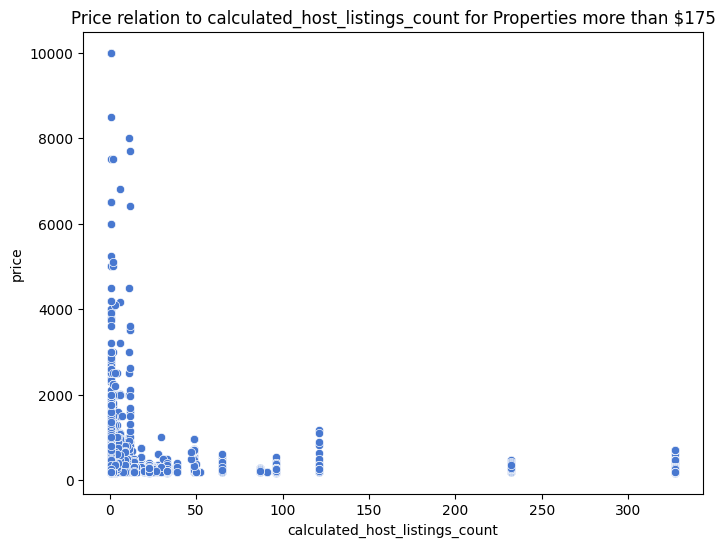

In [ ]:
sns.set_palette("muted")
x = 'calculated_host_listings_count'
y = 'price'

title = 'Price relation to calculated_host_listings_count for Properties under $175'
data_filtered = data.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price relation to calculated_host_listings_count for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()
sns.set_palette(cbPalette)
plt.show()


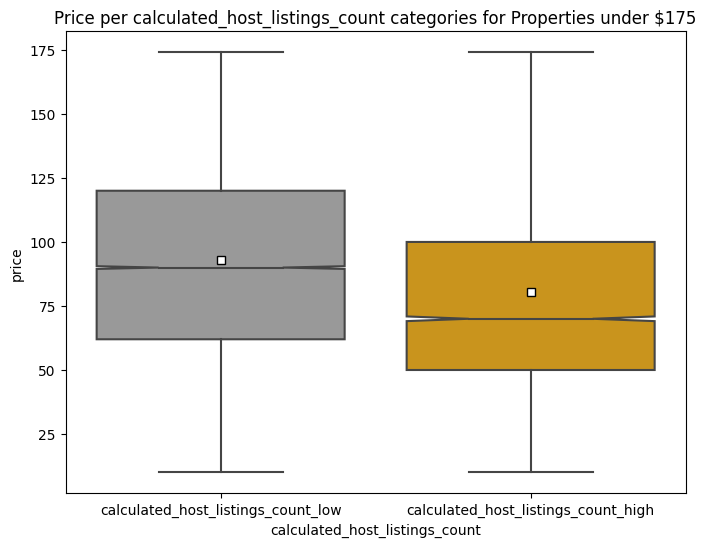

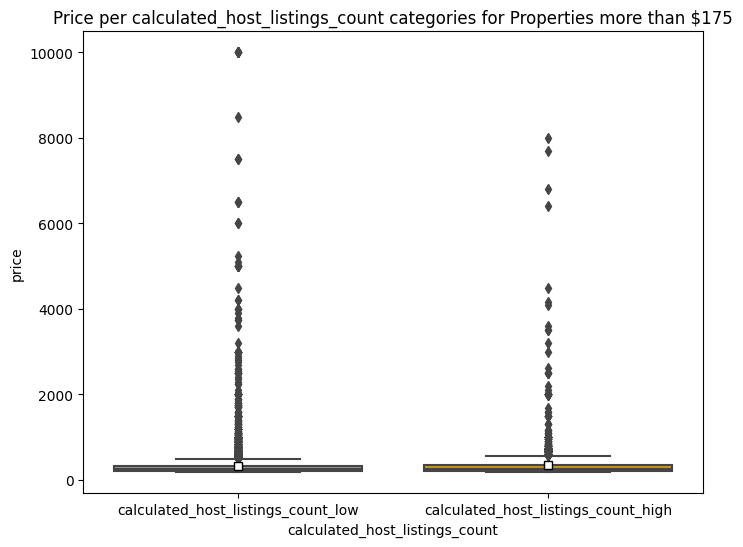

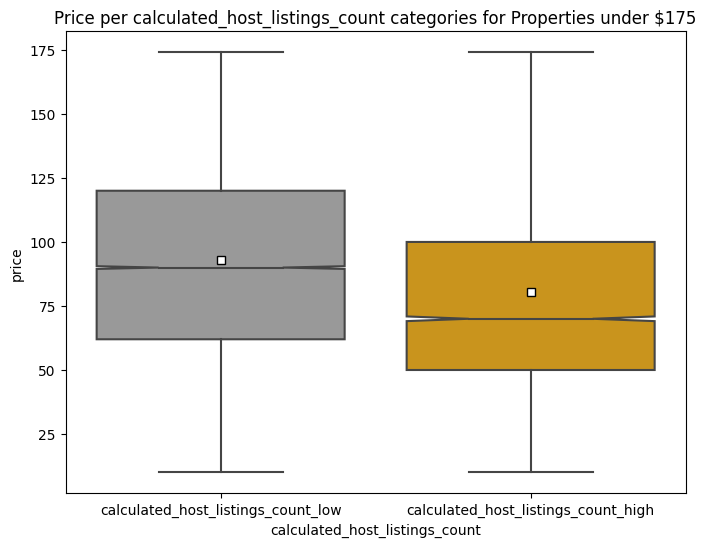

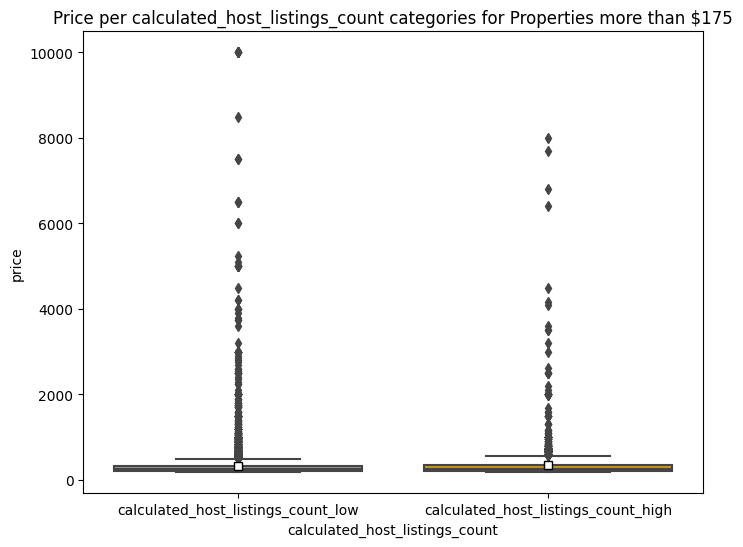

In [ ]:
x = 'calculated_host_listings_count'
y='price'

title = 'Price per calculated_host_listings_count categories for Properties under $175'
data_filtered = data_encoded.loc[data_encoded['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

title = 'Price per calculated_host_listings_count categories for Properties more than $175'
data_filtered = data_encoded.loc[data_encoded['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()
plt.show()


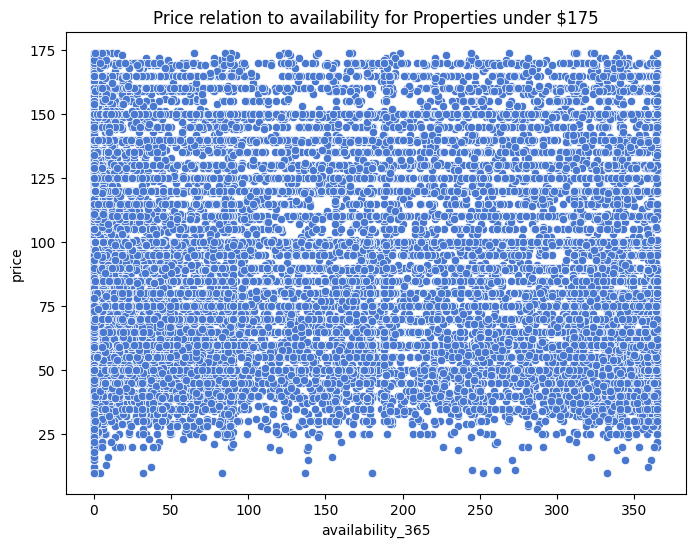

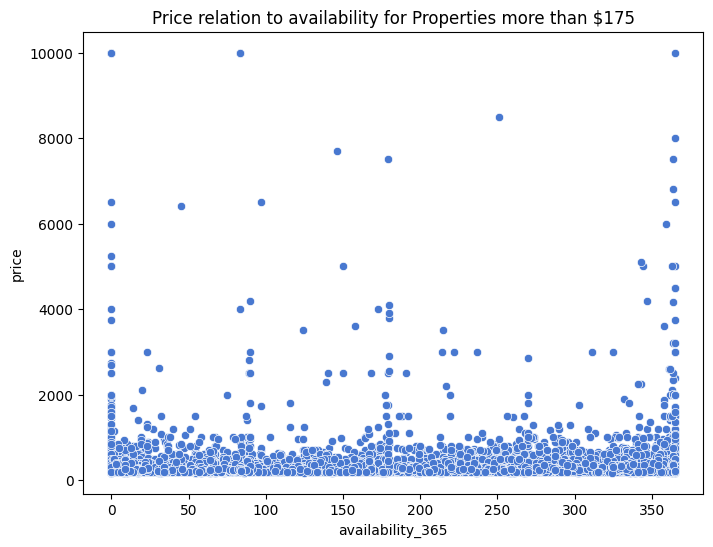

In [ ]:
sns.set_palette("muted")
x = 'availability_365'
y = 'price'

title = 'Price relation to availability for Properties under $175'
data_filtered = data.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price relation to availability for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()
sns.set_palette(cbPalette)
plt.show()


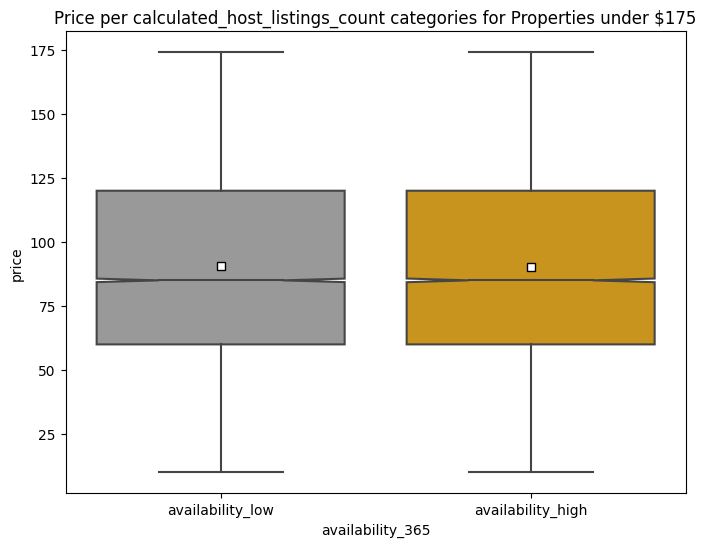

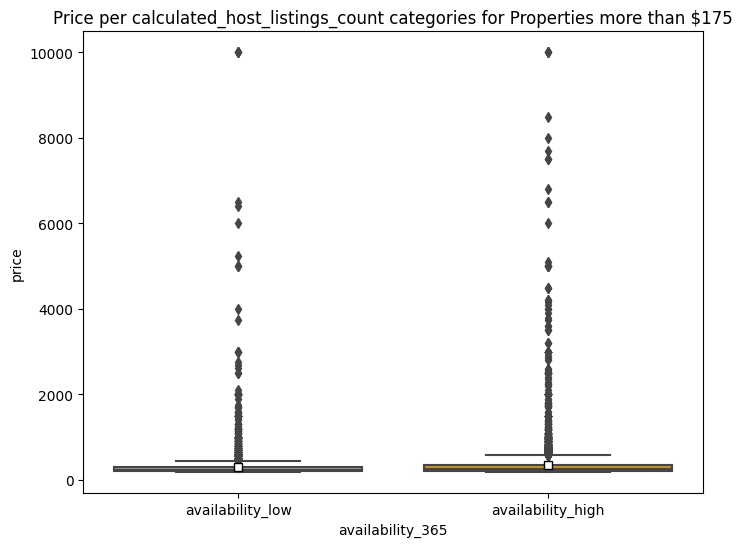

In [ ]:
x = 'availability_365'
y='price'

title = 'Price per calculated_host_listings_count categories for Properties under $175'
data_filtered = data_encoded.loc[data_encoded['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

title = 'Price per calculated_host_listings_count categories for Properties more than $175'
data_filtered = data_encoded.loc[data_encoded['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()
plt.show()


In [ ]:
data.drop(['name'], axis=1, inplace=True)
data_copy = data.copy()

In [ ]:
data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
data.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
data_copy = data.copy()
data.minimum_nights += 0.000000001
data['minimum_nights'] = np.log10(data['minimum_nights'])
data.number_of_reviews += 0.000000001
data['number_of_reviews'] = np.log10(data['number_of_reviews'])
data.reviews_per_month += 0.000000001
data['reviews_per_month'] = np.log10(data['reviews_per_month'])
data.calculated_host_listings_count += 0.000000001
data['calculated_host_listings_count'] = np.log10(data['calculated_host_listings_count'])
data.availability_365 += 0.000000001
data['availability_365'] = np.log10(data['availability_365'])

In [ ]:
data = pd.get_dummies(data, columns=['room_type'], drop_first=True)
data = pd.get_dummies(data, columns=['neighbourhood'], drop_first=True)
data = pd.get_dummies(data, columns=['neighbourhood_group'], drop_first=True)

In [ ]:
data_filtered_low = data.loc[(data['price'] < 175)]

In [ ]:
data_filtered_low.shape

(35944, 235)

In [ ]:
data_filtered_high = data.loc[(data['price'] > 175)]

In [ ]:
data_filtered_high.shape

(12177, 235)

In [ ]:
X = data_filtered_low.drop('price', axis=1).values
y = data_filtered_low['price'].values
y = np.log10(y)

In [ ]:
from sklearn.model_selection import train_test_split

# Now you can use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [ ]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfr.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0),
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
0,33.0,57.0
1,85.0,84.0
2,84.0,123.0
3,75.0,60.0
4,169.0,131.0
5,50.0,57.0
6,45.0,61.0
7,95.0,107.0
8,70.0,57.0
9,58.0,80.0


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, rfr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, rfr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, rfr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 1.92
Price std: 0.2
RMSE: 0.13
R2 score train: 0.62
R2 score test: 0.55


In [ ]:
# Split the dataset
X = data_filtered_high.drop('price', axis=1).values
y = data_filtered_high['price'].values
y = np.log10(y)

In [ ]:
# Split the dataset
X = data_filtered_high.drop('price', axis=1).values
y = data_filtered_high['price'].values
y = np.log10(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfr.predict(X_test)# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfr.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0),
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
0,300.0,297.0
1,195.0,243.0
2,197.0,255.0
3,299.0,254.0
4,190.0,262.0
5,250.0,261.0
6,180.0,290.0
7,300.0,286.0
8,1000.0,251.0
9,180.0,242.0


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, rfr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, rfr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, rfr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 2.45
Price std: 0.2
RMSE: 0.19
R2 score train: 0.29
R2 score test: 0.16


In [ ]:
data_encoded.drop(['name'], axis=1, inplace=True)

In [ ]:
data['availability_365_cat'] = data_encoded['availability_365']
data.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,...,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,availability_365_cat
0,2787,40.64749,-73.97237,149,4.342945e-10,0.954243,-0.677781,7.781513e-01,2.562293,1,...,0,0,0,0,0,1,0,0,0,availability_high
1,2845,40.75362,-73.98377,225,4.342945e-10,1.653213,-0.420216,3.010300e-01,2.550228,0,...,0,0,0,0,0,0,1,0,0,availability_high
2,4632,40.80902,-73.94190,150,4.771213e-01,-9.000000,-9.000000,4.342945e-10,2.562293,1,...,0,0,0,0,0,0,1,0,0,availability_high
3,4869,40.68514,-73.95976,89,4.342945e-10,2.431364,0.666518,4.342945e-10,2.287802,0,...,0,0,0,0,0,1,0,0,0,availability_high
4,7192,40.79851,-73.94399,80,1.000000e+00,0.954243,-1.000000,4.342945e-10,-9.000000,0,...,0,0,0,0,0,0,1,0,0,availability_low


In [132]:
# Encoding categorical data
data_encoded = pd.get_dummies(data_encoded, columns=['neighbourhood_group'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['neighbourhood'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['room_type'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['minimum_nights'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['number_of_reviews'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['reviews_per_month'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['calculated_host_listings_count'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['availability_365'], drop_first=True)

In [133]:
data_encoded.head()

,host_id,latitude,longitude,price,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Arden Heights,neighbourhood_Arrochar,...,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Private room,room_type_Shared room,minimum_nights_minimum_nights_high,number_of_reviews_minimum_nights_medium,number_of_reviews_number_of_reviews_high,reviews_per_month_reviews_per_month_high,calculated_host_listings_count_calculated_host_listings_count_high,availability_365_availability_high
0,2787,40.64749,-73.97237,149,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
1,2845,40.75362,-73.98377,225,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,4632,40.80902,-73.94190,150,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,4869,40.68514,-73.95976,89,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
4,7192,40.79851,-73.94399,80,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [134]:
# Data filtering
# Filter the dataset for prices between 50 and $175
data_filtered_low = data_encoded.loc[(data['price'] < 175)]
# Filter the dataset for prices superior to $175
data_filtered_high = data_encoded.loc[(data['price'] > 175)]

In [136]:
# Split the dataset
X = data_filtered_low.drop('price', axis=1).values
y = data_filtered_low['price'].values
y = np.log10(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfr.predict(X_test)

df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0),
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
0,33.0,57.0
1,85.0,74.0
2,84.0,117.0
3,75.0,60.0
4,169.0,131.0
5,50.0,57.0
6,45.0,60.0
7,95.0,107.0
8,70.0,59.0
9,58.0,72.0


In [137]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, rfr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, rfr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, rfr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 1.92
Price std: 0.2
RMSE: 0.13
R2 score train: 0.6
R2 score test: 0.54


In [138]:
# Split the dataset
X = data_filtered_high.drop('price', axis=1).values
y = data_filtered_high['price'].values
y = np.log10(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfr.predict(X_test)

df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0),
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

In [139]:
print('Price mean:', np.round(np.mean(y), 2))
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, rfr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, rfr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, rfr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 2.45
Price std: 0.2
RMSE: 0.2
R2 score train: 0.22
R2 score test: 0.09
